# Plot examples

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

import numpy as np
import pandas as pd

from skrisk import RiskProject

In [2]:
class ContractBiding(RiskProject):
    def num_competing_bids(self, num_competitors, prob_competitors):
        return pd.DataFrame(self.binomial(num_competitors, prob_competitors))

    def competing_bids(self, param_competitors, num_competing_bids):
        return num_competing_bids.apply(
            lambda x: self.rng.triangular(**param_competitors, size=x)
            * self.nodes["project_cost"]["parameters"]["mode"],
            axis=1,
        )

    def win_contract(self, competing_bids, my_bid):
        competitors_best_bid = competing_bids.apply(
            lambda x: x.min() if x.size else np.inf
        )
        return competitors_best_bid > my_bid

    def profit(self, win_contract, my_bid, project_cost, bid_cost):
        return (win_contract * (my_bid - project_cost)) - bid_cost

In [3]:
cb = ContractBiding()

cb.add_input("num_competitors", 4, "Number of Potential Competitors")
cb.add_input("prob_competitors", 0.5, "Probability a given competitor bids")
cb.add_input(
    "param_competitors",
    {"left": 0.9, "mode": 1.3, "right": 1.8},
    "Base competitors parameters",
)
cb.add_random(
    "bid_cost",
    "triangular",
    {"left": 300, "mode": 350, "right": 500},
    "Cost to prepare a bid",
)
cb.add_random(
    "project_cost",
    "triangular",
    {"left": 9000, "mode": 10000, "right": 15000},
    "Cost to complete project",
)
cb.add_operation(
    "num_competing_bids",
    "num_competing_bids",
    ("num_competitors", "prob_competitors"),
    "Number of competing bids",
)
cb.add_operation(
    "competing_bids",
    "competing_bids",
    ("param_competitors", "num_competing_bids"),
    "Competing Bids",
)
cb.add_input("my_bid", 10500, "Miller's bid")
cb.add_random(
    "project_cost", "triangular", {"left": 9000, "mode": 10000, "right": 15000}
)
cb.add_random("bid_cost", "triangular", {"left": 300, "mode": 350, "right": 500})
cb.add_operation(
    "win_contract",
    "win_contract",
    ("competing_bids", "my_bid"),
    "Miller wins contract?",
    "pie",
)

cb.add_goal(
    "profit", "profit", ("win_contract", "my_bid", "project_cost", "bid_cost"), "profit"
)

In [4]:
profit = cb.eval("profit")
print(profit)

0      -348.396867
1       506.285317
2       -55.932458
3       549.556306
4     -1194.745913
          ...     
995   -1026.738992
996   -1717.252496
997     327.864172
998    -752.270879
999   -1311.827934
Length: 1000, dtype: float64


# Plots

Create a plot from a node externally:

<AxesSubplot:ylabel='Count'>

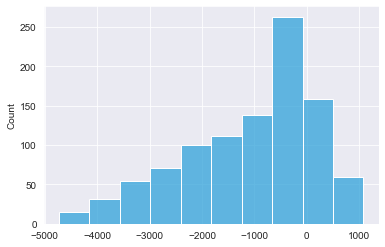

In [5]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.set_style("darkgrid")
sns.histplot(cb.nodes["profit"]["value"], bins=10)

Default plotting:

Plot saved in file: /tmp/skrisk/profit_histogram_36.png


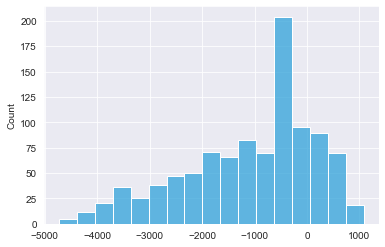

<Figure size 432x288 with 0 Axes>

In [6]:
cb.generate_histogram("profit")

Leveraging some Seaborn parameters:

Plot saved in file: /tmp/skrisk/profit_histogram_37.png


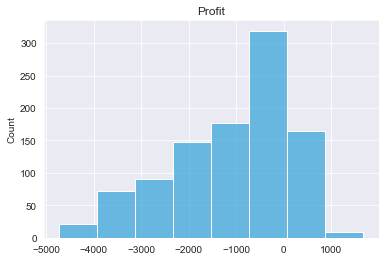

<Figure size 432x288 with 0 Axes>

In [7]:
cb.generate_histogram("profit", title="Profit", fill=True, binwidth=800, alpha=0.7)

Set style and palette globally:

In [10]:
cb.plot_palette = [
    "#8b8b8b",
    "#30a2da",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

cb.plot_style = "whitegrid"

Plot saved in file: /tmp/skrisk/profit_histogram_38.png


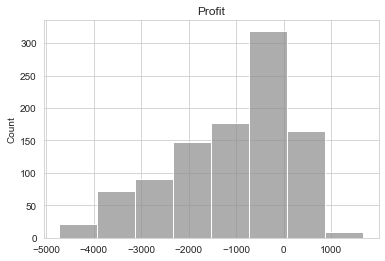

<Figure size 432x288 with 0 Axes>

In [11]:
cb.generate_histogram("profit", title="Profit", fill=True, binwidth=800, alpha=0.7)

# Report

Plot saved in file: ./bid_cost_histogram_10.png
./bid_cost_histogram_10.png
Plot saved in file: ./project_cost_histogram_10.png
./project_cost_histogram_10.png
Plot saved in file: ./num_competing_bids_histogram_10.png
./num_competing_bids_histogram_10.png
Plot saved in file: ./win_contract_histogram_9.png
./win_contract_histogram_9.png
Plot saved in file: ./profit_histogram_9.png
./profit_histogram_9.png


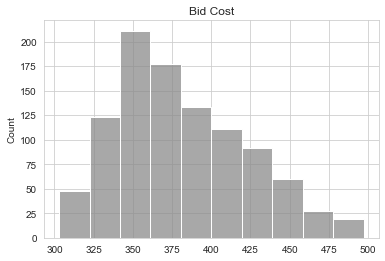

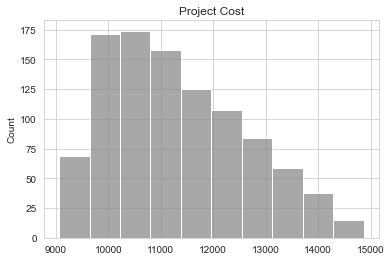

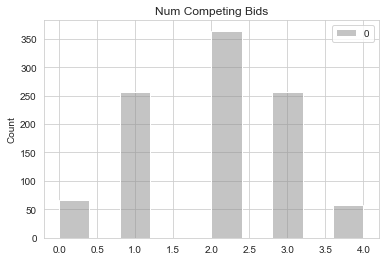

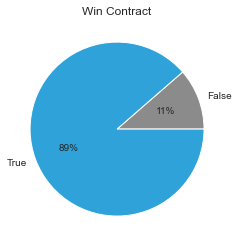

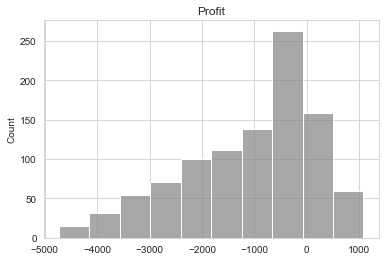

<Figure size 432x288 with 0 Axes>

In [9]:
cb.generate_stats("profit")
cb.generate_stats("project_cost")
cb.generate_report("MyReport","competing_bids")